In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm

In [3]:
df_from_json = pd.read_json('SciFi_Bs2PhiPhi_2018_200000.json')

In [61]:
df_from_json[[ 'MCParticlePID','MCParticleKey', 'MCHit_Y']]

,MCParticlePID,MCParticleKey,MCHit_Y
2,13,7425,[-1357.8205566406]
3,13,7425,[-1357.8205566406]
6,-211,8662,[-619.8460083008]
7,-211,8662,[-619.8460083008]
8,2212,7414,[-960.1837158203]
9,2212,7414,[-960.1837158203]
10,2212,7414,[-960.1837158203]
11,-211,8698,[-380.7073669434]
12,13,8558,[-118.2590179443]
13,13,8181,[-99.8808441162]


In [16]:
# Data columns
i = 0
for val in df_from_json.columns:
    print(i," ",val)
    i = i + 1

0   ClusterChannelID
1   ClusterChannelIDMat
2   ClusterChannelIDModule
3   ClusterChannelIDSipmCell
4   ClusterChannelIDSipmID
5   ClusterChannelIDStation
6   ClusterChannelLayer
7   ClusterChannelQuarter
8   ClusterFraction
9   ClusterSize
10   CosSlopeX
11   CosSlopeY
12   Energy
13   Hit_Zone
14   Hit_dxDy
15   Hit_dzDy_manually
16   Hit_w
17   Hit_yMax
18   Hit_yMin
19   MCHit_EntryX
20   MCHit_EntryY
21   MCHit_EntryZ
22   MCHit_ExitX
23   MCHit_ExitY
24   MCHit_ExitZ
25   MCHit_Physics
26   MCHit_X
27   MCHit_Y
28   MCHit_Z
29   MCParticleAccT
30   MCParticleAccTT
31   MCParticleBeta
32   MCParticleGamma
33   MCParticleIsLong
34   MCParticleIsSeed
35   MCParticleKey
36   MCParticleP
37   MCParticlePID
38   MCParticlePhi
39   MCParticlePseudoRapidity
40   MCParticlePt
41   MCParticleVirtualMass
42   MCParticle_Physics
43   N_MC
44   PathLength
45   PrHit_XatYEq0
46   PrHit_ZatYEq0
47   Residual_X
48   Residual_Z
49   isNoiseCluster
50   isT1
51   isT2
52   isT3
53   isU
54   isV


In [62]:
# Get values, thus converting it to arrays
hits = df_from_json.values

In [50]:
t1 = np.where(hits[:,50])[0]
t2 = np.where(hits[:,51])[0]
t3 = np.where(hits[:,52])[0]

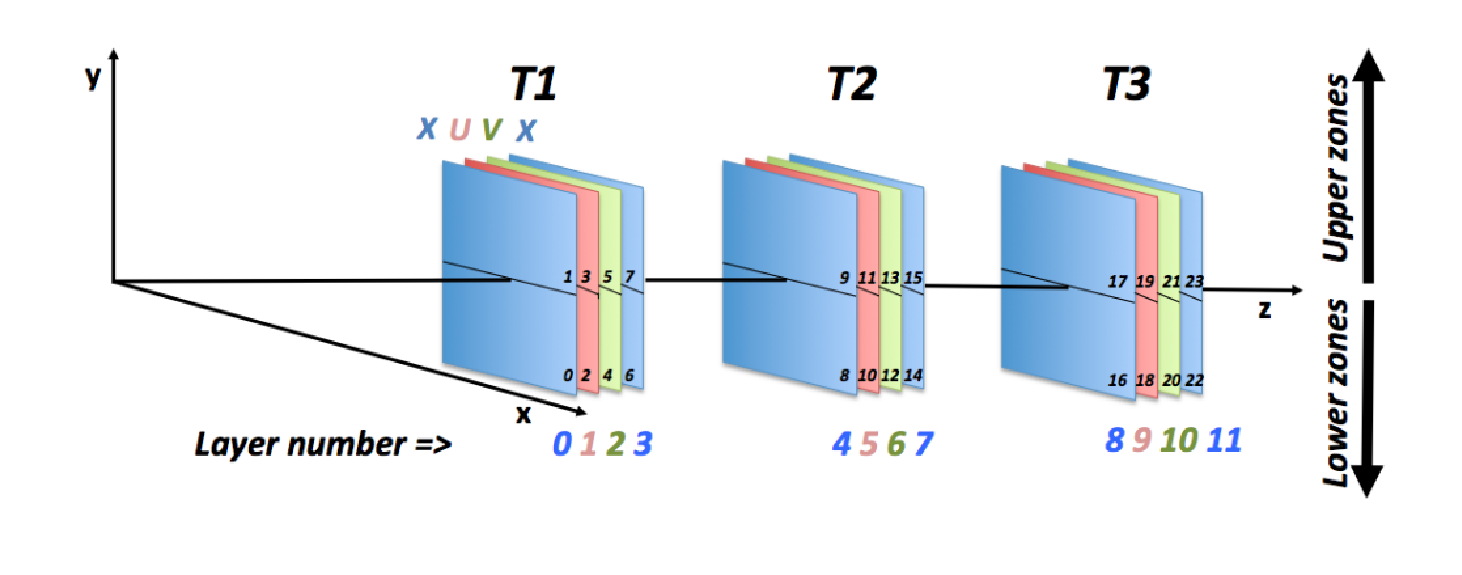

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('Structure.png')
plt.figure(figsize=(15, 8), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(img) 
plt.axis('off')
plt.show()

In [21]:
# Extraction of the layers from the dataset
# It has the following structure
# E.g. For station 1: [[Zone_0, Zone_1], [Zone_2,Zone3], [Zone_4,Zone_5], [Zone_6, Zone_7]]
def createStationLayers(station):
    station_layers = []
    zone = (station - 1) * 8 
    for index in range(4):
        layer = []
        station_layers.append(hits[((hits[:,57] > (zone - 1)) & (hits[:,57] < zone + 2))])
        zone = zone + 2
    return station_layers

In [22]:
def show3DMCPlotHits(hitSet, max):
    X = np.zeros(shape=(max))
    Y = np.zeros(shape=(max))
    Z = np.zeros(shape=(max))
    
    i = 0
    for value in hitSet:
        X[i] = (value[26][0])
        Y[i] = (value[27][0])
        Z[i] = (value[28][0])
        i = i + 1
        if i == max:
            break
    
    Z = Z.reshape(-1,1)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, s=3)
    # Plot the surface.
    ax.grid()
    plt.show()
    return ax

In [23]:
# Create a 2D plot based on the hitSet provided together with the defined columns in x_column and y_column
# The max value represents the maximum number of values to plot, suitable in case a lack of memory in the host
# executing it...

def show2DPlotHits(hitSet, x_column, y_column, max):
    if max < 0:
        X = np.zeros(shape=(hitSet.shape[0]))
        Y = np.zeros(shape=(hitSet.shape[0]))
    else:
        X = np.zeros(shape=(max))
        Y = np.zeros(shape=(max))
    
    i = 0
    for value in hitSet:
        if (type(value[x_column]) is list):
            X[i] = value[x_column][0]
            Y[i] = value[y_column][0]
        else:
            X[i] = value[x_column]
            Y[i] = value[y_column]
        i = i + 1
        if i == max:
            break
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111)
    ax.scatter(X, Y, s=3)
    # Plot the surface.
    ax.grid()
    plt.show()

In [51]:
# Get hits for each layer
t1_layers = createStationLayers(1)
t1_layers = createStationLayers(2)
t1_layers = createStationLayers(3)

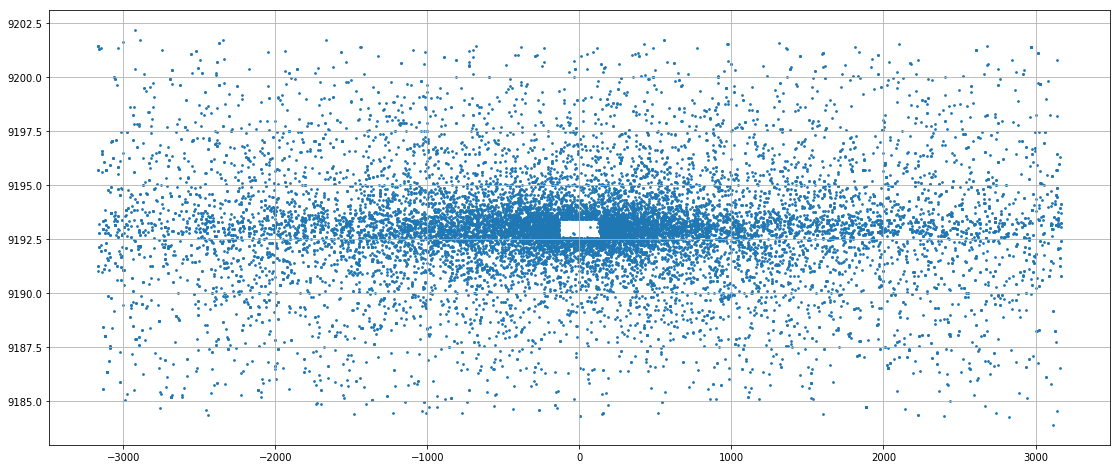

In [43]:
# Plotting MC hits of layer 0 based on the X and Z values
show2DPlotHits(t1_layers[0],26,28,-1)

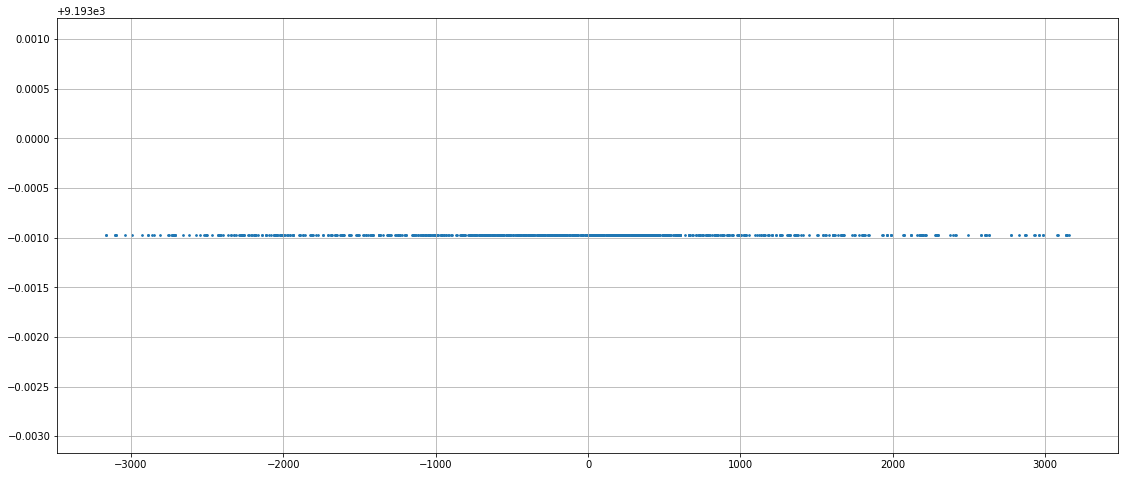

In [26]:
show2DPlotHits(t1_layers[0],45,46,1000)

In [27]:
def showTracksMCHits(hitSet, elev, angle, max):
    
    # Get the different keys from all hits (And discard the repeated ones)
    particleIds = np.unique(hitSet[:,35])
    
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    i = 0
    # Iterate through all the particles keys obtained 
    for particle in particleIds:
        
        # Get all hits from the given particle key
        particleHits = hitSet[np.where(hitSet[:,35] == particle]
        
        # Extract X,Y and Z from the particle hits
        X = [x[0] for x in particleHits[:,26]]
        Y = [x[0] for x in particleHits[:,27]]
        Z = [x[0] for x in particleHits[:,28]]
        
        ax.plot(X, Z, Y)
        ax.text(X[0], Y[0], Z[0], color='r', s='asdadsad')
            
        i = i + 1
        if i == max:
            break
            
    ax.view_init(elev=elev, azim=angle)
    ax.grid()
    plt.show()

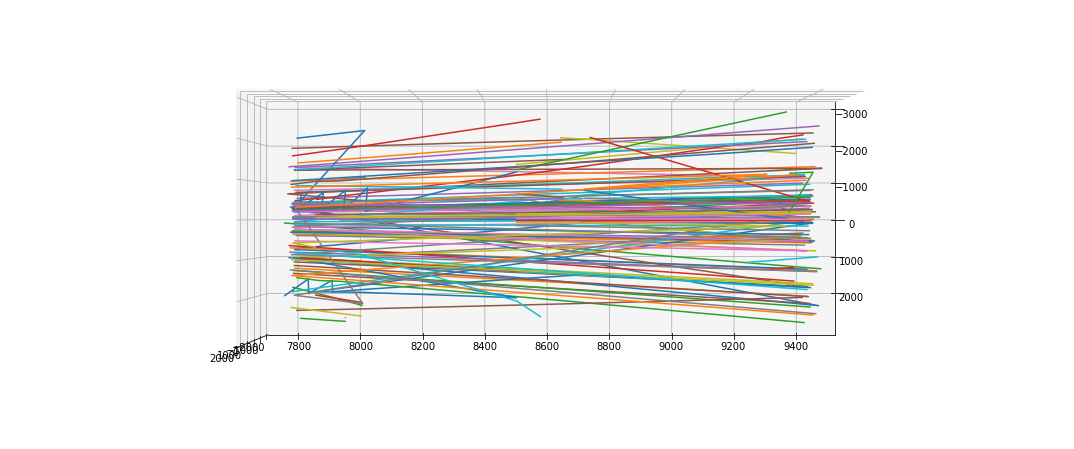

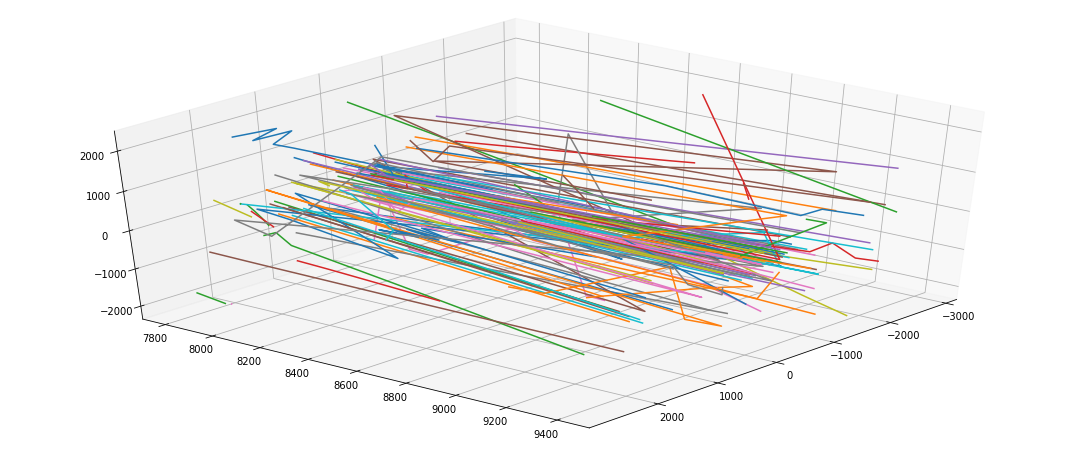

In [63]:
showTracksMCHits(hits, 90, 0, 120)
showTracksMCHits(hits, 40, 40, 120)

In [64]:
particleHits = hits[np.where(hits[:,35] == 431)]
X = [x[0] for x in particleHits[:,26]]
Y = [x[0] for x in particleHits[:,27]]
Z = [x[0] for x in particleHits[:,28]]
print(hits[hits[:,35] == 431][5][35])
print(hits[hits[:,35] == 431][11][35])
print(hits[hits[:,35] == 431][5][37])
print(hits[hits[:,35] == 431][11][37])
print(hits[hits[:,35] == 431][5][36])
print(hits[hits[:,35] == 431][11][36])
print(X)
print(Y)
print(Z)
fig = plt.figure(figsize=(19, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X, Z, Y)
ax.view_init(elev=0, azim=0)
ax.grid()
plt.show()

431


IndexError: index 11 is out of bounds for axis 0 with size 11